In [68]:
import numpy as np

import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters

%matplotlib inline
%config InlineBackend.figure_format='retina'

register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

In [69]:
# Retrieve data

colnames=['device', 'id', 'value', 'ts'] 
df = pd.read_csv('manuela-vibration-2020-09-18-19.csv', header=None, names=colnames)

# Set time as index
df['time'] = pd.to_datetime(df['ts'],unit='ms')
df.set_index('time', inplace=True)
df.drop(columns=['ts'], inplace=True)

In [70]:
df.head()

,device,id,value
time,,,
2020-09-18 19:19:15.967,floor-1-line-1-extruder-1,pump-2,16.569483
2020-09-18 19:19:16.002,floor-1-line-1-extruder-1,pump-1,8.964599
2020-09-18 19:19:20.967,floor-1-line-1-extruder-1,pump-2,17.106412
2020-09-18 19:19:21.002,floor-1-line-1-extruder-1,pump-1,10.039939
2020-09-18 19:19:25.967,floor-1-line-1-extruder-1,pump-2,18.925731


In [71]:
df.describe()

,value
count,16980.000000
mean,14.007420
std,3.612884
min,8.093797
25%,11.561303
50%,13.780069
75%,16.005972
max,49.082705


<AxesSubplot:xlabel='value'>

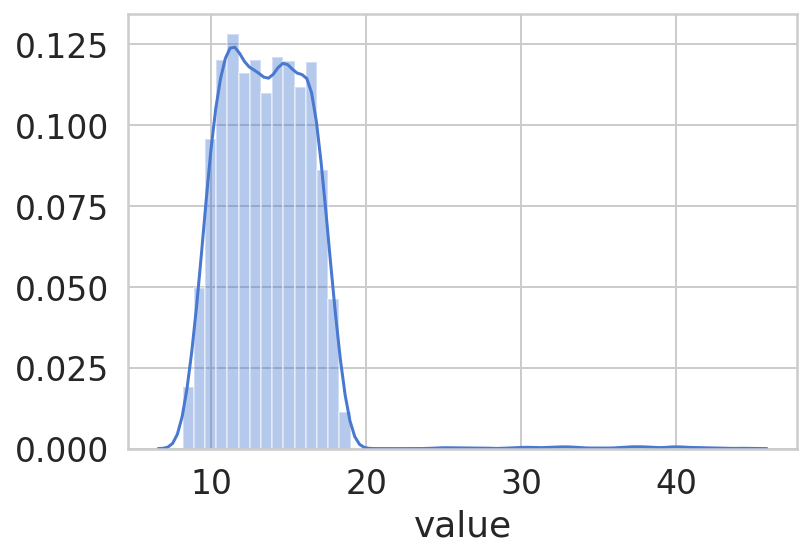

In [72]:
sns.distplot(df.query('id == "pump-1"')['value'].dropna())

<AxesSubplot:xlabel='value'>

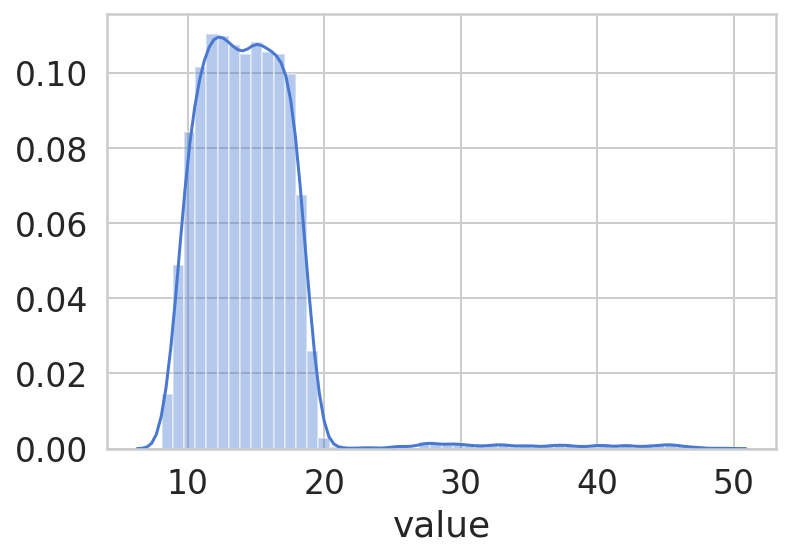

In [73]:
sns.distplot(df.query('id == "pump-2"')['value'].dropna())

In [74]:
df.query('id == "pump-1" and value > 20').count()

device    51
id        51
value     51
dtype: int64

In [75]:
df.query('id == "pump-2" and value > 20').count()

device    164
id        164
value     164
dtype: int64

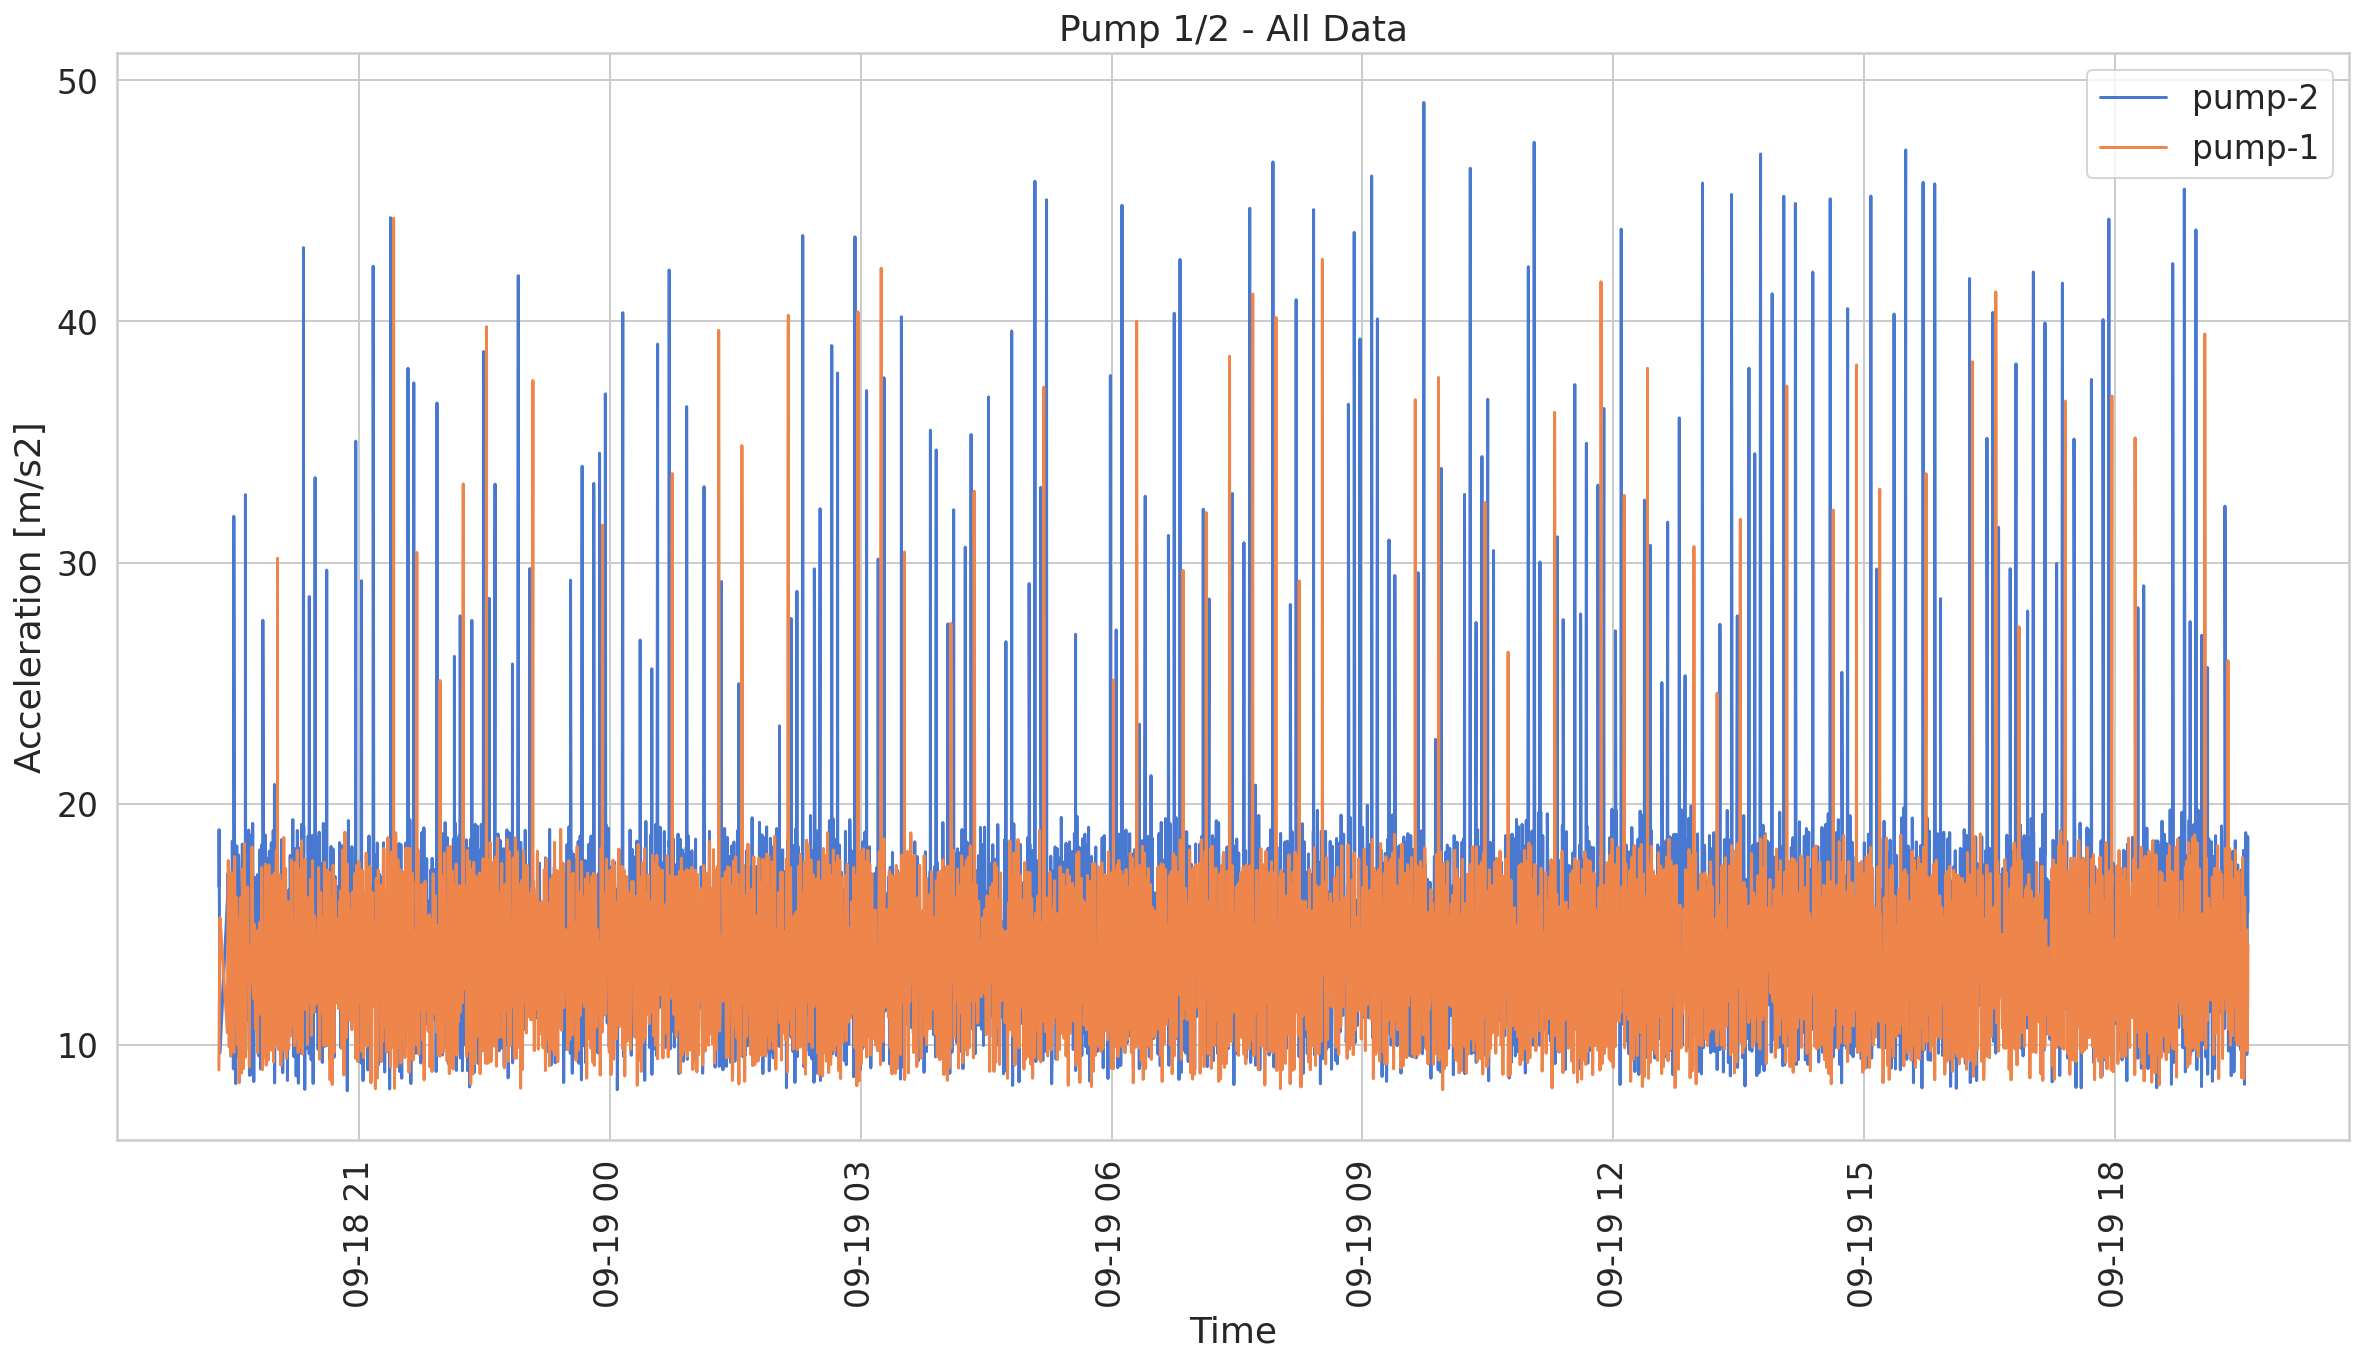

In [76]:
fig= plt.figure(figsize=(20,10))

for pump in df['id'].unique():
    y = df.loc[(df['id'] == pump)]
    df_time = [pd.to_datetime(t) for t in y.index]
    plt.plot(df_time, y["value"].values, label=pump)

plt.legend()
plt.title("Pump 1/2 - All Data")
plt.xlabel("Time")
plt.xticks(rotation=90)
plt.ylabel("Acceleration [m/s2]")
plt.show()

/home/sbergste/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


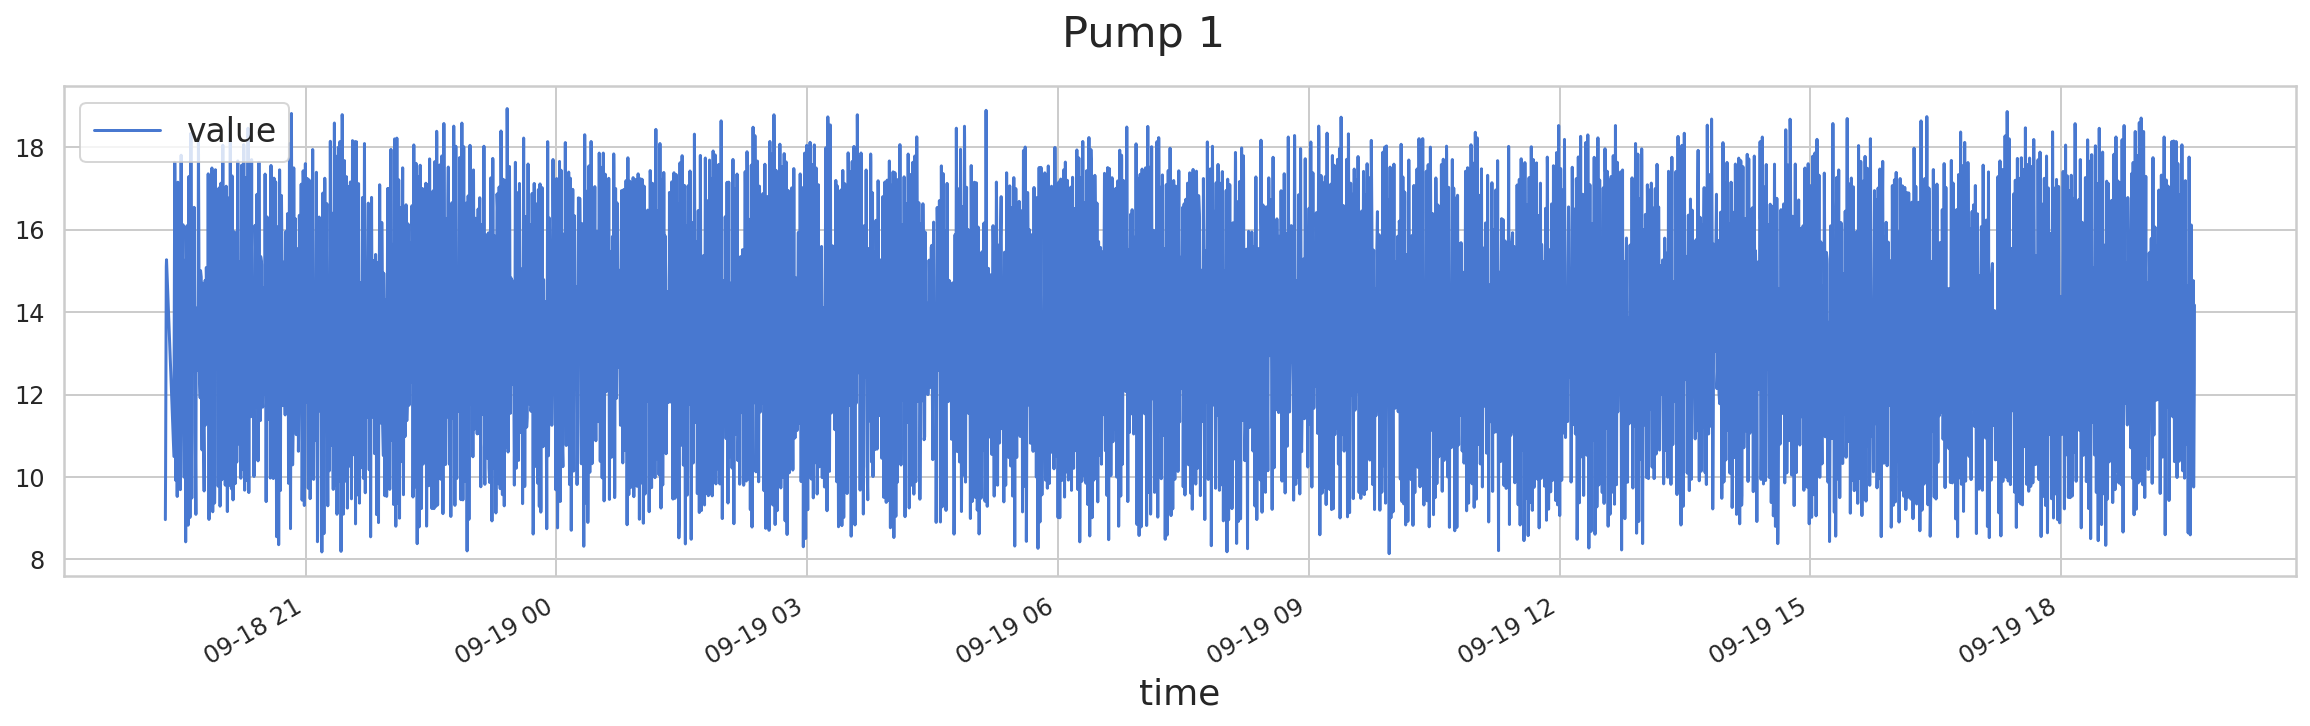

In [89]:
df1 = df.loc[df['id'] == 'pump-1']

df1.loc[df1['value'] > 20, 'value'] = df1['value'] / 2.5
df1 = df1.drop(columns=['id'])
df1.plot(figsize=(20,5),  fontsize=12, subplots=True,  title = "Pump 1")
plt.show()

<AxesSubplot:xlabel='value'>

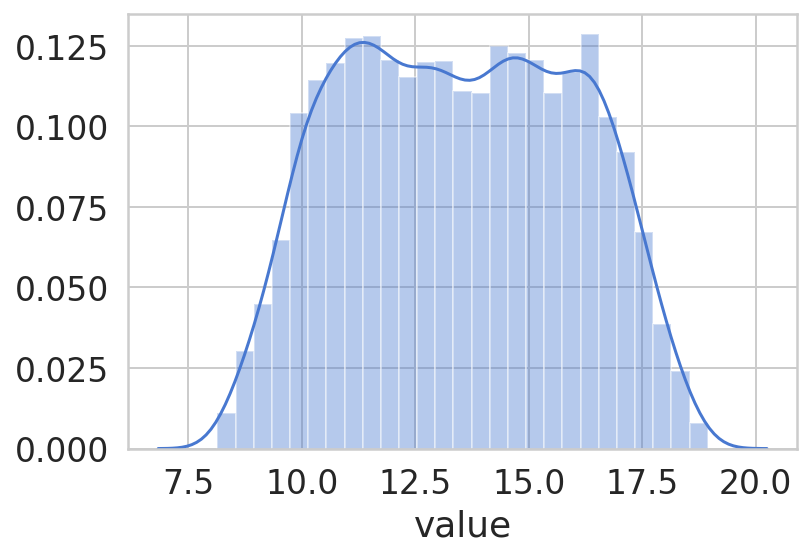

In [91]:
sns.distplot(df1['value'].dropna())

/home/sbergste/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


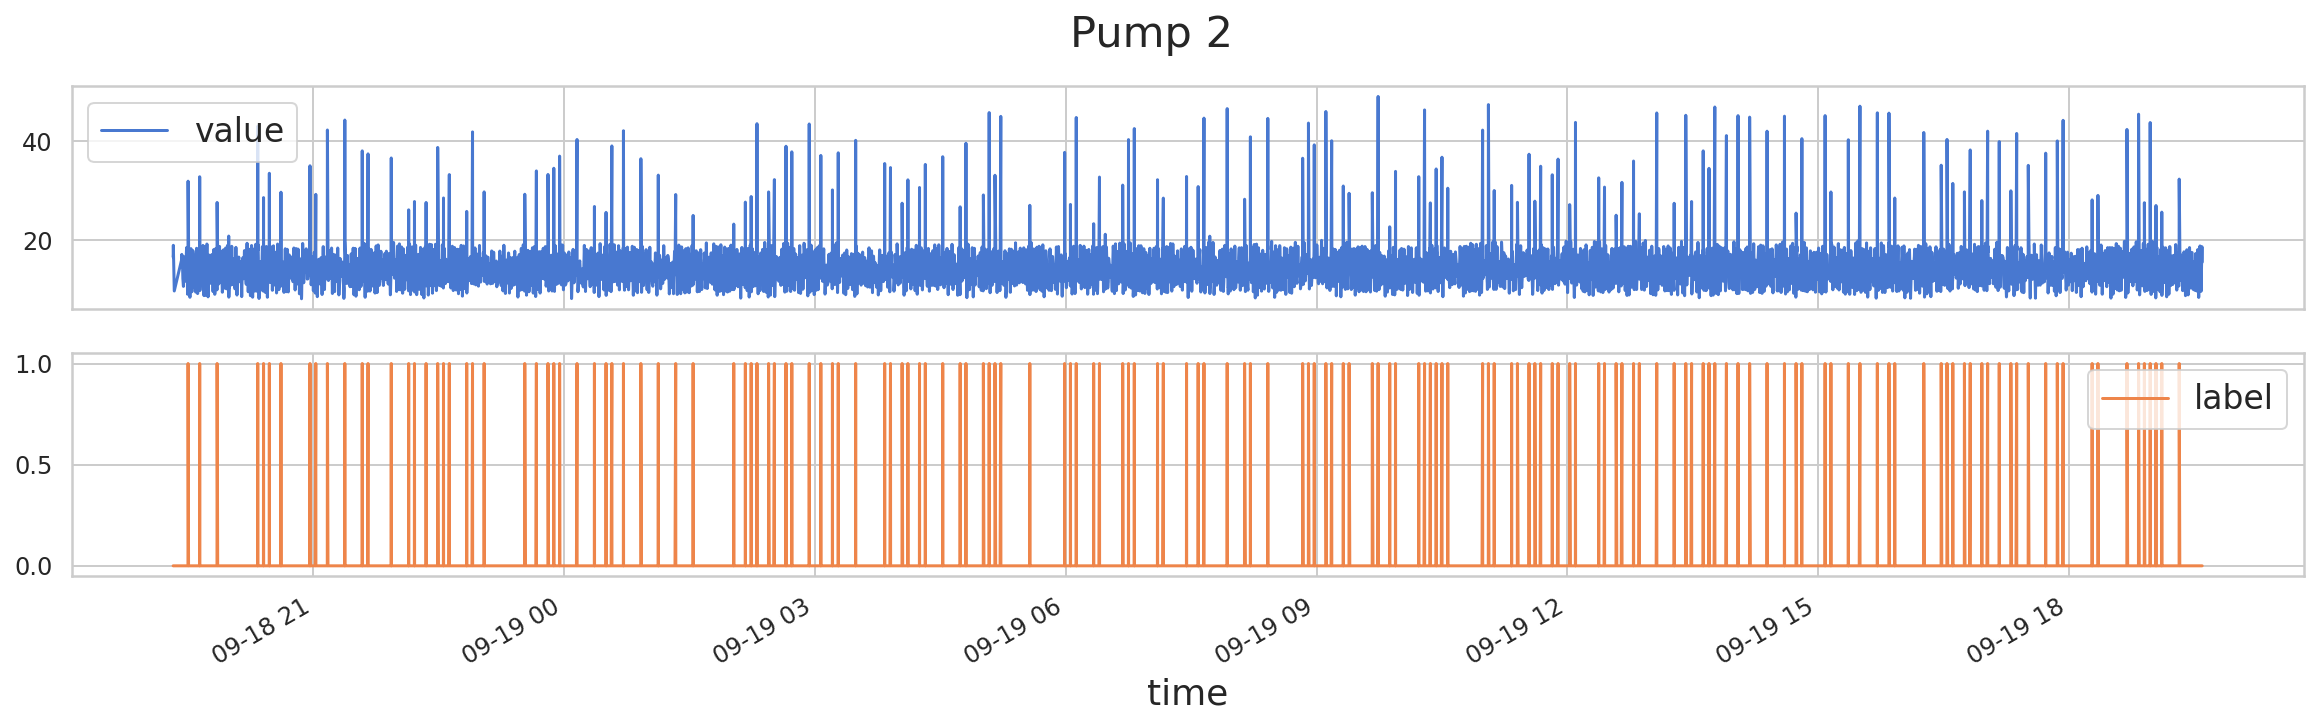

In [90]:
df2 = df.loc[df['id'] == 'pump-2']
df2['label'] = 0
df2 = df2.drop(columns=['id'])
df2.loc[df2['value'] > 22, 'label'] = 1
df2.plot(figsize=(20,5),  fontsize=12,subplots=True,  title = "Pump 2")
plt.show()

In [79]:
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 100)
pd.set_option('display.min_rows', 100)
pd.set_option('display.expand_frame_repr', True)
df1

,device,value
time,,
2020-09-18 19:19:16.002,floor-1-line-1-extruder-1,8.964599
2020-09-18 19:19:21.002,floor-1-line-1-extruder-1,10.039939
2020-09-18 19:19:26.002,floor-1-line-1-extruder-1,10.126215
2020-09-18 19:19:56.002,floor-1-line-1-extruder-1,15.097281
2020-09-18 19:20:06.002,floor-1-line-1-extruder-1,15.273144
2020-09-18 19:25:26.002,floor-1-line-1-extruder-1,10.497104
2020-09-18 19:25:31.002,floor-1-line-1-extruder-1,12.352416
2020-09-18 19:26:01.004,floor-1-line-1-extruder-1,17.639155
2020-09-18 19:26:06.002,floor-1-line-1-extruder-1,17.377613


In [80]:
df1['value'].groupby(pd.Grouper(freq='1min')).count()

time
2020-09-18 19:19:00    4
2020-09-18 19:20:00    1
2020-09-18 19:21:00    0
2020-09-18 19:22:00    0
2020-09-18 19:23:00    0
2020-09-18 19:24:00    0
2020-09-18 19:25:00    2
2020-09-18 19:26:00    7
2020-09-18 19:27:00    6
2020-09-18 19:28:00    6
2020-09-18 19:29:00    7
2020-09-18 19:30:00    6
2020-09-18 19:31:00    5
2020-09-18 19:32:00    7
2020-09-18 19:33:00    6
2020-09-18 19:34:00    5
2020-09-18 19:35:00    5
2020-09-18 19:36:00    6
2020-09-18 19:37:00    7
2020-09-18 19:38:00    5
2020-09-18 19:39:00    6
2020-09-18 19:40:00    5
2020-09-18 19:41:00    5
2020-09-18 19:42:00    7
2020-09-18 19:43:00    5
2020-09-18 19:44:00    4
2020-09-18 19:45:00    7
2020-09-18 19:46:00    4
2020-09-18 19:47:00    6
2020-09-18 19:48:00    6
2020-09-18 19:49:00    6
2020-09-18 19:50:00    6
2020-09-18 19:51:00    3
2020-09-18 19:52:00    5
2020-09-18 19:53:00    6
2020-09-18 19:54:00    8
2020-09-18 19:55:00    6
2020-09-18 19:56:00    5
2020-09-18 19:57:00    5
2020-09-18 19:58:00 

<AxesSubplot:xlabel='value'>

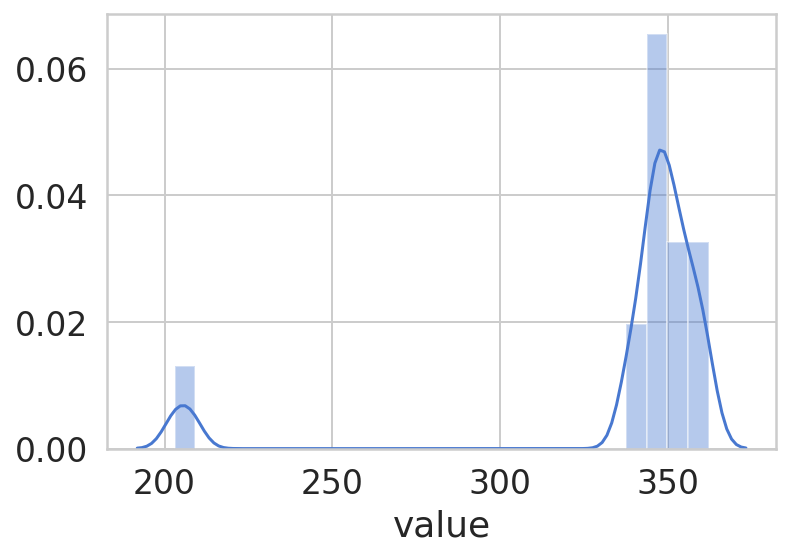

In [81]:
sns.distplot(df1['value'].groupby(pd.Grouper(freq='60min')).count())

<AxesSubplot:xlabel='value'>

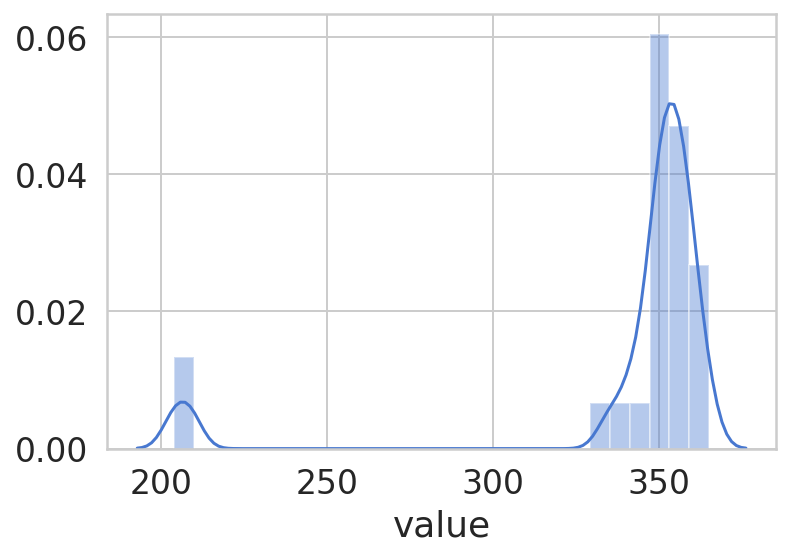

In [82]:
sns.distplot(df2['value'].groupby(pd.Grouper(freq='60min')).count())